In [3]:
#Importing the Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_excel('/content/drive/MyDrive/House Price Prediction.xlsx')

In [4]:
data.head()

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2019-02-04,NaN,NaN,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,2019-05-04,NaN,NaN,15246.056
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,2019-07-17,NaN,NaN,2178.008
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,2019-04-05,NaN,NaN,10890.000
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,2019-07-10,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008


In [5]:
data.shape

(168446, 18)

In [6]:
data.isnull().sum()

Unnamed: 0           0
property_id          0
location_id          0
page_url             0
property_type       34
price                0
location            21
city                 0
province_name        0
latitude             0
longitude            0
baths                0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44073
Total_Area           0
dtype: int64

In [7]:
data.columns

Index(['Unnamed: 0', 'property_id', 'location_id', 'page_url', 'property_type',
       'price', 'location', 'city', 'province_name', 'latitude', 'longitude',
       'baths', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'Total_Area'],
      dtype='object')

In [11]:
data.keys()

Index(['Unnamed: 0', 'property_id', 'location_id', 'page_url', 'property_type',
       'price', 'location', 'city', 'province_name', 'latitude', 'longitude',
       'baths', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'Total_Area'],
      dtype='object')

In [15]:
data.describe()

,Unnamed: 0,property_id,location_id,price,latitude,longitude,baths,bedrooms,Total_Area
count,168446.000000,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,1.684460e+05
mean,84222.500000,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,1.394239e+04
std,48626.316059,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,8.623647e+05
min,0.000000,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000e+00
25%,42111.250000,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,1.905757e+03
50%,84222.500000,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,4.356016e+03
75%,126333.750000,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,1.197904e+04
max,168445.000000,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,3.387988e+08


In [17]:
data.duplicated().sum()

0

In [18]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [31]:
data.tail()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
168441,17355248,6754,https://www.zameen.com/Property/gulshan_e_maym...,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,For Sale,6,2019-07-18,Al Shahab Enterprises,Shahmir,26136.096
168442,17355249,680,https://www.zameen.com/Property/gadap_town_gul...,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,For Sale,3,2019-07-18,Al Shahab Enterprises,Shahmir,2178.008
168443,17355250,6757,https://www.zameen.com/Property/gulshan_e_maym...,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,For Sale,6,2019-07-18,Al Shahab Enterprises,Shahmir,26136.096
168444,17355251,6752,https://www.zameen.com/Property/gulshan_e_maym...,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,For Sale,3,2019-07-18,Al Shahab Enterprises,Shahmir,21235.578
168445,17355287,10045,https://www.zameen.com/Property/bahria_town_ka...,House,9000000,Bahria Town Karachi,Karachi,Sindh,25.113565,67.353811,3,For Sale,3,2019-07-18,ZPN Real Estate & Builders,Ali Raza,25591.594


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   property_id    168446 non-null  int64         
 1   location_id    168446 non-null  int64         
 2   page_url       168446 non-null  object        
 3   property_type  168412 non-null  object        
 4   price          168446 non-null  int64         
 5   location       168425 non-null  object        
 6   city           168446 non-null  object        
 7   province_name  168446 non-null  object        
 8   latitude       168446 non-null  float64       
 9   longitude      168446 non-null  float64       
 10  baths          168446 non-null  int64         
 11  purpose        168446 non-null  object        
 12  bedrooms       168446 non-null  int64         
 13  date_added     168446 non-null  datetime64[ns]
 14  agency         124375 non-null  object        
 15  

In [35]:
data['price']=data['price'].astype('float32')

<ipython-input-30-152cdd42ef2d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


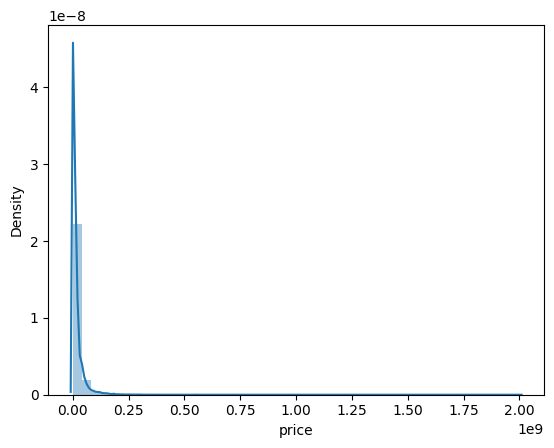

In [30]:
sns.distplot(data['price'])
plt.show()

In [66]:
data.corr()['price']

<ipython-input-66-8d819dfdca41>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['price']


property_id   -0.029669
location_id   -0.098426
price          1.000000
latitude      -0.071193
longitude     -0.019225
baths          0.230205
bedrooms       0.314145
Total_Area     0.008168
Name: price, dtype: float64

In [49]:
data.keys()

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'purpose', 'bedrooms', 'date_added', 'agency', 'agent', 'Total_Area'],
      dtype='object')

<Axes: >

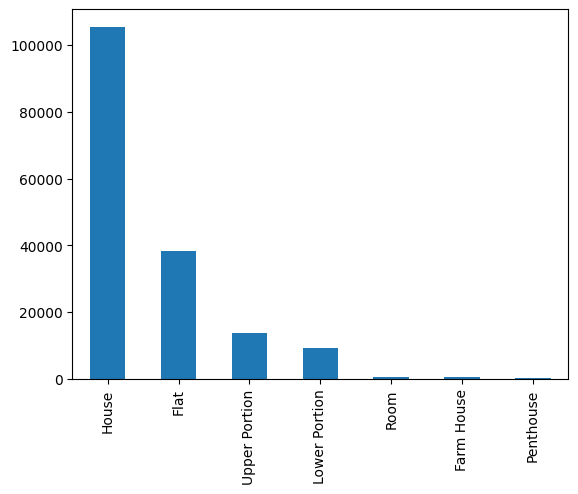

In [47]:
data['property_type'].value_counts().plot(kind='bar')

<Axes: >

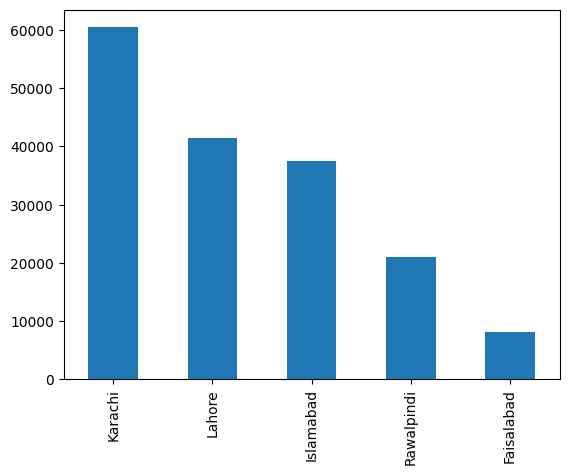

In [54]:
data['city'].value_counts().plot(kind='bar')

<Axes: >

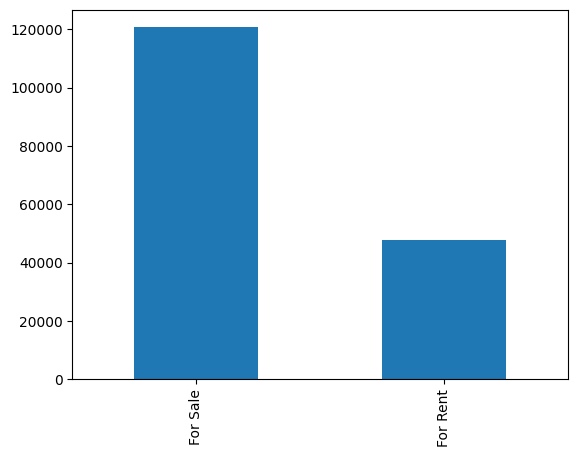

In [55]:
data['purpose'].value_counts().plot(kind='bar')

<Axes: >

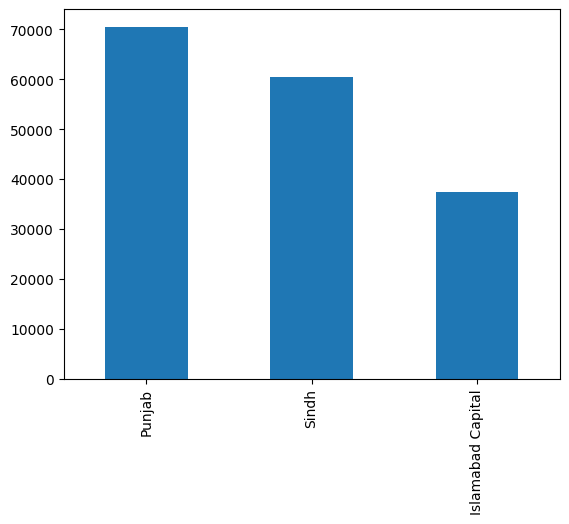

In [56]:
data['province_name'].value_counts().plot(kind='bar')

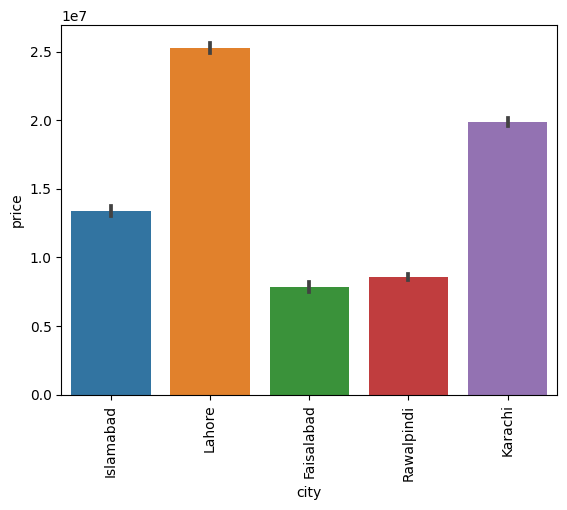

In [57]:
sns.barplot(x=data['city'],y=data['price'])
plt.xticks(rotation='vertical')
plt.show()

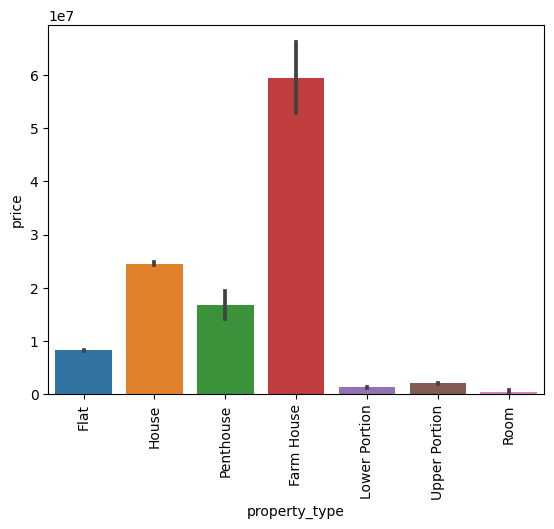

In [58]:
sns.barplot(x=data['property_type'],y=data['price'])
plt.xticks(rotation='vertical')
plt.show()

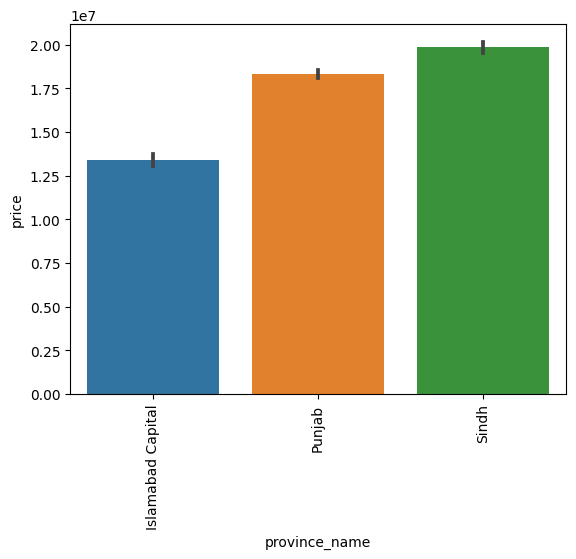

In [59]:
sns.barplot(x=data['province_name'],y=data['price'])
plt.xticks(rotation='vertical')
plt.show()

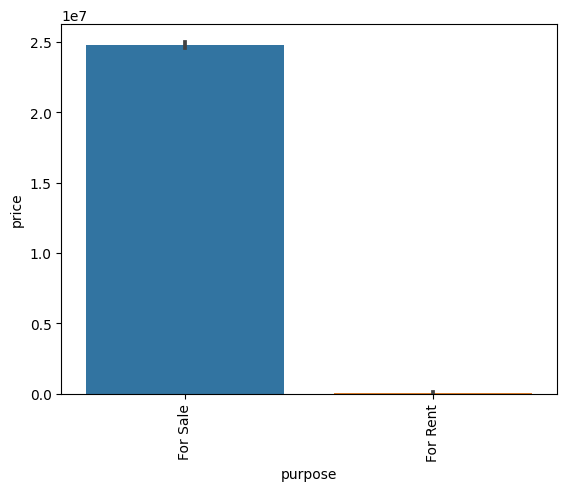

In [62]:
sns.barplot(x=data['purpose'],y=data['price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.groupby('categorical_column')['numerical_column'].mean()


In [68]:
data.groupby('province_name')['price'].mean()

province_name
Islamabad Capital    13398327.0
Punjab               18305450.0
Sindh                19838834.0
Name: price, dtype: float32

In [ ]:
sns.boxplot(x='categorical_column', y='numerical_column', data=df)
plt.show()

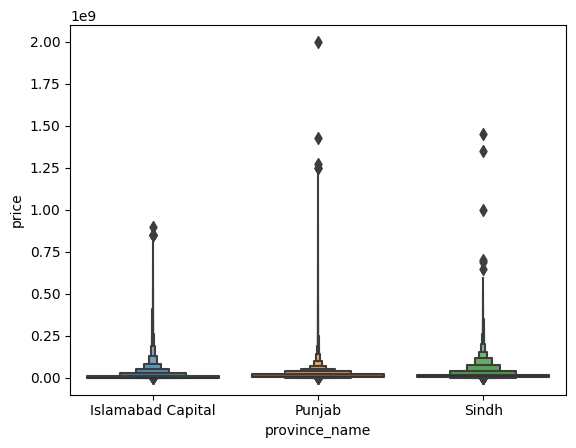

In [72]:
sns.boxenplot(x='province_name',y='price',data=data)
plt.show()

In [73]:
data.keys()

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'purpose', 'bedrooms', 'date_added', 'agency', 'agent', 'Total_Area'],
      dtype='object')

In [ ]:
data.drop(column=['property_id','location_id'])

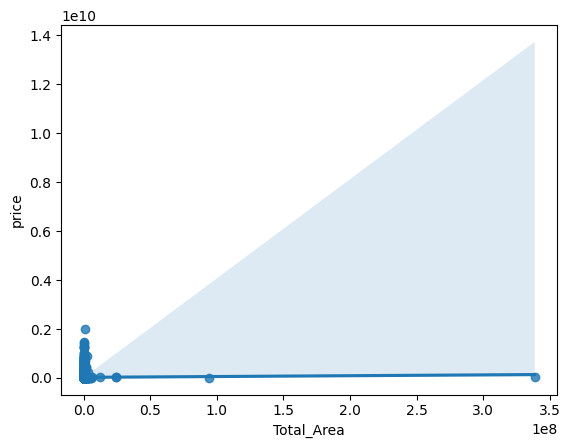

In [75]:
sns.regplot(x='Total_Area',y='price',data=data)
plt.show()

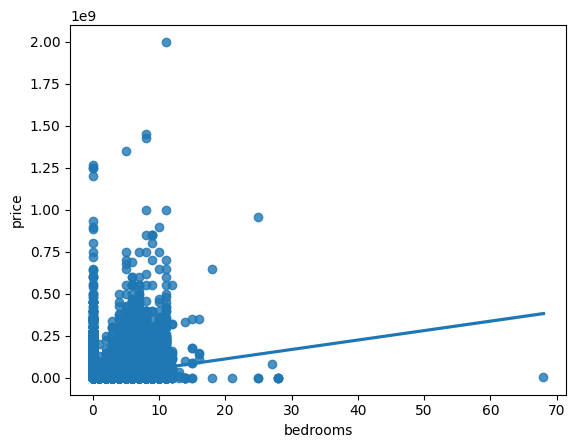

In [76]:
sns.regplot(x='bedrooms',y='price',data=data)
plt.show()

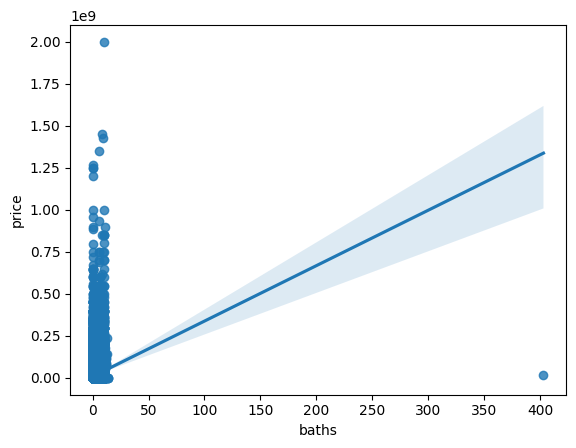

In [77]:
sns.regplot(x='baths',y='price',data=data)
plt.show()

<ipython-input-79-b89471c4101c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bedrooms'])


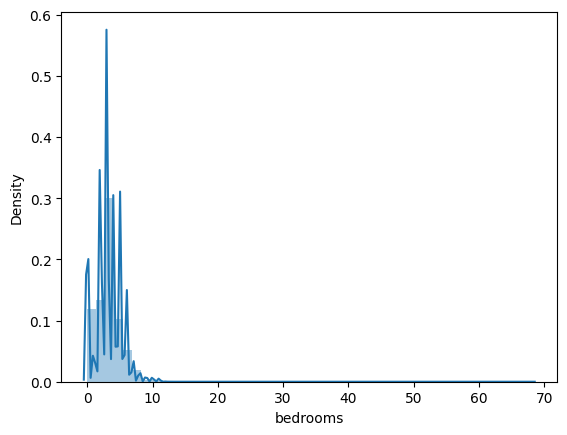

In [79]:
sns.distplot(data['bedrooms'])
plt.show()

<ipython-input-81-ee003d212b37>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['baths'])


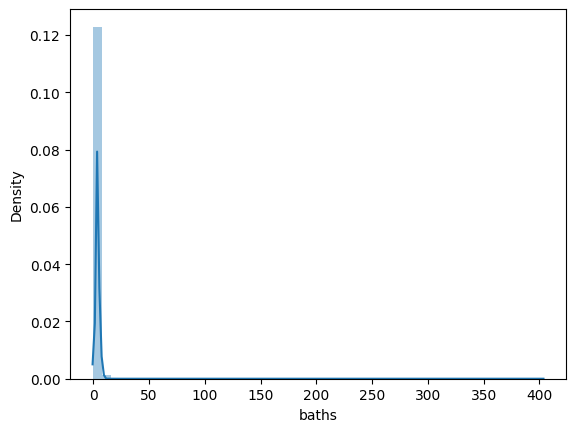

In [81]:
sns.distplot(data['baths'])
plt.show()

<ipython-input-83-e1f6767f1be6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['date_added'])


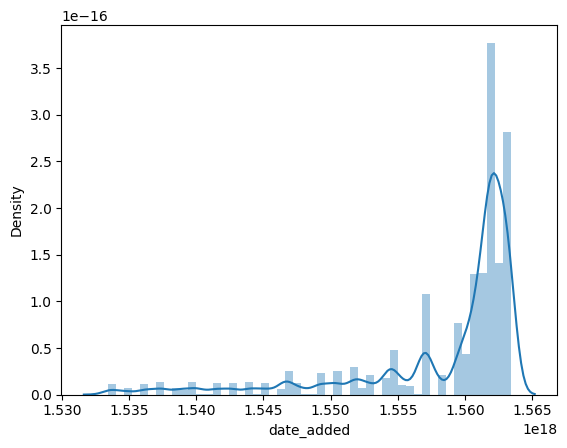

In [83]:
sns.distplot(data['date_added'])
plt.show()

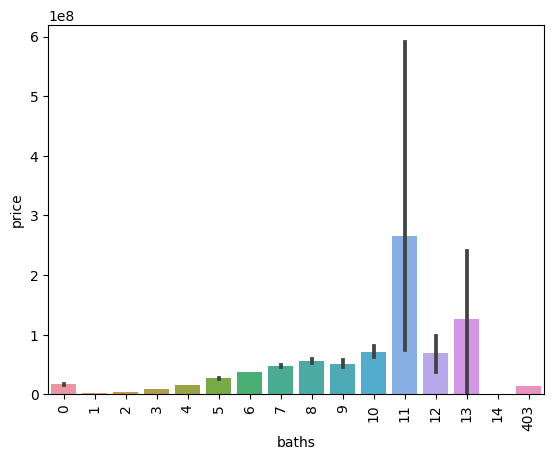

In [91]:
sns.barplot(x=data['baths'],y=data['price'])
plt.xticks(rotation='vertical')
plt.show()

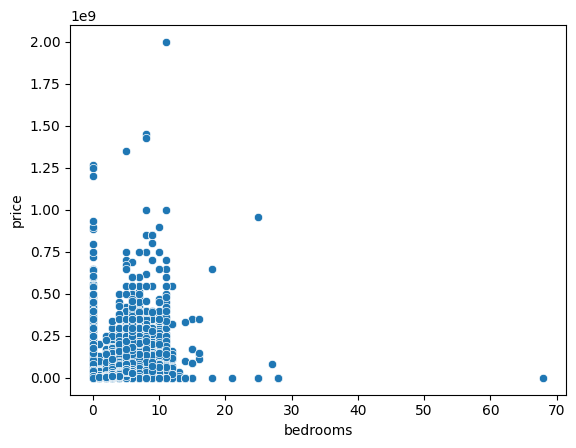

In [93]:
sns.scatterplot(x=data['bedrooms'],y=data['price'])
plt.show()

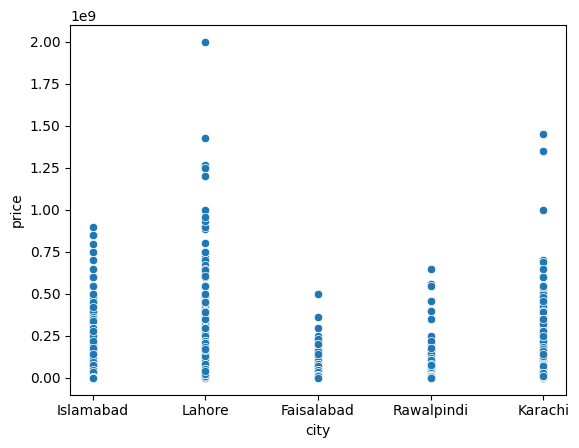

In [95]:
sns.scatterplot(x=data['city'],y=data['price'])
plt.show()